### Insurance Data set

In [2]:
We have insurance data and we have to predict Insurance charges.
data break up as follow :
    Independent Variable : age, sex, bmi, children, smoker, region
    Dependent Variable : charges

SyntaxError: invalid syntax (790342841.py, line 1)

#### Import Library

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold

from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


### Data Gathering: 

In [6]:
df_insurance = pd.read_csv('insurance.csv')
df_insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
df_insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df_insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### 1) Age

In [10]:
df_insurance['age']

0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64

In [11]:
df_insurance['age'].isnull().sum()

0

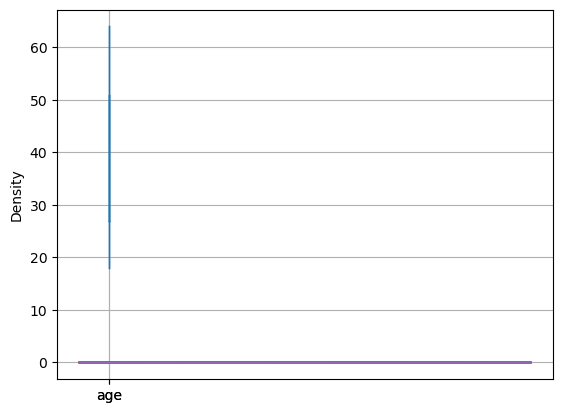

In [20]:
df_insurance.boxplot('age')
plt.show()

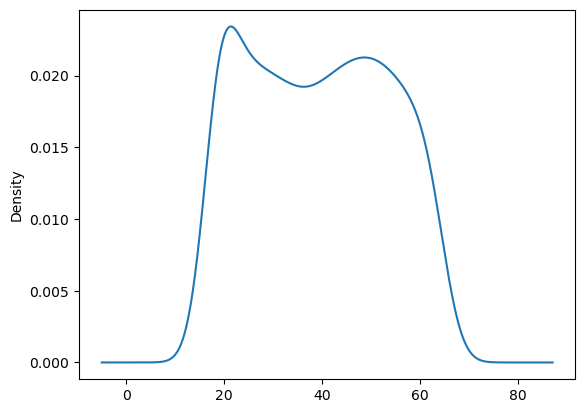

In [60]:
df_insurance['age'].plot.kde()
plt.show()

In [61]:
df_insurance['age'].skew()


0.05567251565299186

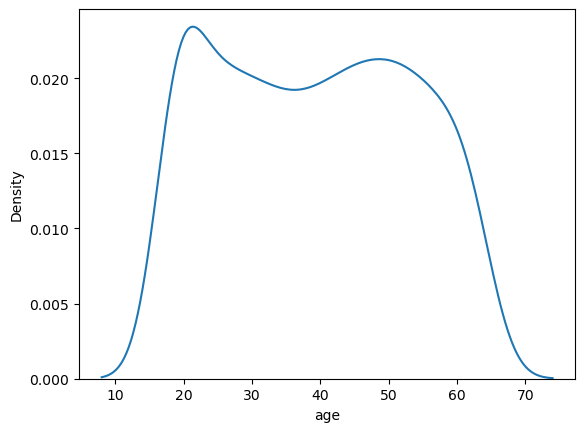

In [62]:
sns.kdeplot(df_insurance['age'])
plt.show()

### 2) sex

In [35]:
df_insurance['sex'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1338 entries, 0 to 1337
Series name: sex
Non-Null Count  Dtype 
--------------  ----- 
1338 non-null   object
dtypes: object(1)
memory usage: 10.6+ KB


In [36]:
df_insurance['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [37]:
df_insurance['sex'].replace({'male':1, 'female':0}, inplace = True)
df_insurance['sex']

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex, Length: 1338, dtype: int64

In [38]:
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,2,16884.92400
1,18,1,33.770,1,no,3,1725.55230
2,28,1,33.000,3,no,3,4449.46200
3,33,1,22.705,0,no,1,21984.47061
4,32,1,28.880,0,no,1,3866.85520


### 3) bmi

In [39]:
df_insurance['bmi'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1338 entries, 0 to 1337
Series name: bmi
Non-Null Count  Dtype  
--------------  -----  
1338 non-null   float64
dtypes: float64(1)
memory usage: 10.6 KB


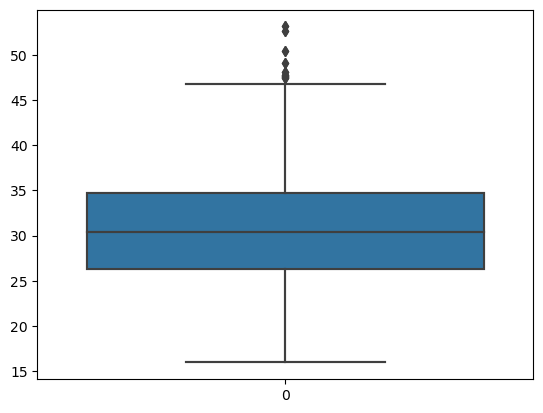

In [41]:
sns.boxplot(df_insurance['bmi'])
plt.show()

### 4) Children

In [42]:
df_insurance['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

### 5) smoker

In [43]:
df_insurance['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [44]:
df_insurance['smoker'].replace({'no':1, 'yes':0}, inplace = True)
df_insurance['smoker']

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    1
1335    1
1336    1
1337    0
Name: smoker, Length: 1338, dtype: int64

In [45]:
df_insurance

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,2,16884.92400
1,18,1,33.770,1,1,3,1725.55230
2,28,1,33.000,3,1,3,4449.46200
3,33,1,22.705,0,1,1,21984.47061
4,32,1,28.880,0,1,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,1,10600.54830
1334,18,0,31.920,0,1,0,2205.98080
1335,18,0,36.850,0,1,3,1629.83350
1336,21,0,25.800,0,1,2,2007.94500


### 6) region

In [46]:
df_insurance['region'].value_counts()

3    364
2    325
1    325
0    324
Name: region, dtype: int64

In [47]:
df_insurance['region'].replace({'southeast':3, 'southwest':2, 'northwest':1, 'northeast':0}, inplace = True)
df_insurance['region']

0       2
1       3
2       3
3       1
4       1
       ..
1333    1
1334    0
1335    3
1336    2
1337    1
Name: region, Length: 1338, dtype: int64

In [ ]:
df_insurance

### 7) charges

In [48]:
df_insurance['charges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1338 entries, 0 to 1337
Series name: charges
Non-Null Count  Dtype  
--------------  -----  
1338 non-null   float64
dtypes: float64(1)
memory usage: 10.6 KB


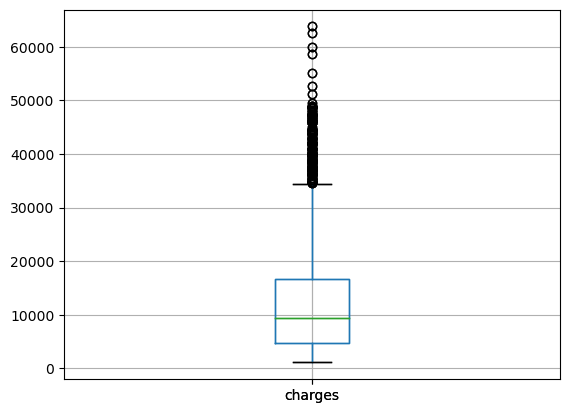

In [30]:
df_insurance.boxplot('charges')
plt.show()

### Feature Selection 

In [ ]:
no need to drop any feature 

In [49]:
df_insurance.corr()['charges'].sort_values()

smoker     -0.787251
region      0.039473
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
charges     1.000000
Name: charges, dtype: float64

### Model Training

#### Train Test Split

In [50]:
x = df_insurance.drop(['charges'], axis = 1)
y = df_insurance['charges']

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 2)

In [52]:
def model_building(algo, x, y):
    model = algo
    model.fit(x,y)
    return model

linear_reg = model_building(LinearRegression(), x_train, y_train)
linear_reg

LinearRegression()

### Evaluation

In [53]:
y_pred = linear_reg.predict(x_test)
y_pred[:5]

array([ 1820.75621886, 11893.35566097, 10391.48426582,  2131.62301167,
        8175.83419518])

In [54]:
y_test[:5]

17       2395.17155
1091    11286.53870
273      9617.66245
270      1719.43630
874      8891.13950
Name: charges, dtype: float64

In [55]:
def evaluation(string, model, ind_var, y_act):
    print(string.center(50,'$'))
    pred = model.predict(ind_var)
    
    mse = mean_squared_error(y_act, pred)
    print('RMSE :' , mse)
    
    rmse = np.sqrt(mse)
    print('MAE :', rmse)
    
    mae = mean_absolute_error(y_act, pred)
    print('MAE :', mae)
    r_squared = r2_score(y_act, pred)
    print('R2_score : ', r_squared)
    
    adj_r2 = 1 - (((1-r_squared)*(ind_var.shape[0]-1))/(ind_var.shape[0]-ind_var.shape[1]-1))
    print('Adjusted R2 : ', adj_r2)
    
evaluation('Test Data Evaluation ', linear_reg, x_test, y_test)
print()

evaluation('Train Data Evaluation', linear_reg, x_train, y_train)

$$$$$$$$$$$$$$Test Data Evaluation $$$$$$$$$$$$$$$
RMSE : 38228939.14400928
MAE : 6182.955534694494
MAE : 4260.502062366075
R2_score :  0.7454471618659976
Adjusted R2 :  0.7395953724836067

$$$$$$$$$$$$$$Train Data Evaluation$$$$$$$$$$$$$$$
RMSE : 36129281.55018396
MAE : 6010.763807552577
MAE : 4141.026284457906
R2_score :  0.7518195459072954
Adjusted R2 :  0.7504187154984936
